# Basic SED Fitting

This is a simple code to fit a BB component to the data.

## Libraries

In [1]:
from os import path, getcwd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import h,k,c
# h = Planck's Constant (m^2 kg/s),
# k = Boltzmann Constant (J/K),
# c = Speed of light in vacuum (m/s)

## Loading the Data

In [2]:
star_file = pd.read_csv("excess_candidates.csv")
star_file.head()

,Unnamed: 0,objid,crowded,badbkgmatch,ra,dec,l,b,nmatches,nreject,...,i1_app_mag,i1_ABS_MAG,i2_app_mag,i2_ABS_MAG,i3_app_mag,i3_ABS_MAG,i4_app_mag,i4_ABS_MAG,m1_app_mag,m1_ABS_MAG
0,112,SSTSL2 J105452.14-615209.2,0,0,163.717252,-61.869238,289.649598,-2.041396,1,0,...,10.905480,5.543741,10.856613,5.494874,10.826000,5.464262,10.373341,5.011602,9.149049,3.787310
1,414,SSTSL2 J023104.40-734232.0,0,0,37.768344,-73.708894,293.839461,-41.614047,1,0,...,11.870919,5.754062,11.773721,5.656865,11.722690,5.605833,11.580324,5.463468,9.470191,3.353334
2,714,SSTSL2 J202430.14+422233.7,0,0,306.125615,42.376034,80.132465,2.729961,1,0,...,11.436771,5.223677,11.242501,5.029407,10.909107,4.696014,10.234137,4.021043,7.777674,1.564581
3,716,SSTSL2 J053548.22-013620.5,0,0,83.950939,-1.605701,205.534991,-17.522007,1,0,...,12.033424,6.837193,11.993180,6.796948,11.924433,6.728202,11.758999,6.562767,9.964545,4.768314
4,913,SSTSL2 J222146.65+583734.5,0,0,335.444398,58.626251,104.487065,1.220537,1,0,...,11.812945,4.988212,11.656484,4.831751,11.492759,4.668025,11.357971,4.533238,8.150057,1.325324


## Printing the column names

In [3]:
star_file.columns.values

array(['Unnamed: 0', 'objid', 'crowded', 'badbkgmatch', 'ra', 'dec', 'l',
       'b', 'nmatches', 'nreject', 'nbands', 'i1_fluxtype', 'i2_fluxtype',
       'i3_fluxtype', 'i4_fluxtype', 'm1_fluxtype', 'i1_fluxflag',
       'i2_fluxflag', 'i3_fluxflag', 'i4_fluxflag', 'm1_fluxflag',
       'i1_softsatflag', 'i2_softsatflag', 'i3_softsatflag',
       'i4_softsatflag', 'i1_f_ap2', 'i1_df_ap2', 'i2_f_ap2', 'i2_df_ap2',
       'i3_f_ap2', 'i3_df_ap2', 'i4_f_ap2', 'i4_df_ap2', 'm1_f_psf',
       'm1_df_psf', 'i1_extfrac', 'i2_extfrac', 'i3_extfrac',
       'i4_extfrac', 'm1_extfrac', 'i1_brtfrac', 'i2_brtfrac',
       'i3_brtfrac', 'i4_brtfrac', 'm1_brtfrac', 'i1_snr', 'i2_snr',
       'i3_snr', 'i4_snr', 'm1_snr', 'i1_seflags', 'i2_seflags',
       'i3_seflags', 'i4_seflags', 'm1_dflag', 'm1_sflag', 'i1_meannoise',
       'i2_meannoise', 'i3_meannoise', 'i4_meannoise', 'm1_meannoise',
       'smid', 'regid', 'irac_obstype', 'mips_obstype', 'i1_coverage',
       'i2_coverage', 'i3_coverage',

## Getting the Information for the Directory

Getting the Information for the Directory

In [4]:
# Get the current directory of this file
file_path = getcwd()

## Normalizing Results to the J flux, the first flux

In [5]:
# Since the J index is the first index, the index is 0
J_index = 0

## Writing a Function to get all the fluxes and errors

In [6]:
def obs_wavelengths_fluxes_flux_errors(data, row_number):
    
    J_flux_Jy       = 1.0e-6*data['j'][row_number]     # 1.235 microns
    J_flux_error_Jy = 1.0e-6*data['dj'][row_number]
    H_flux_Jy       = 1.0e-6*data['h'][row_number]     # 1.662 microns
    H_flux_error_Jy = 1.0e-6*data['dh'][row_number]
    K_flux_Jy       = 1.0e-6*data['k'][row_number]     # 2.159 microns
    K_flux_error_Jy = 1.0e-6*data['dk'][row_number]

    I1_flux_Jy       = 1.0e-6*data['i1_f_ap2'][row_number]     # 3.6 microns
    I1_flux_error_Jy = 1.0e-6*data['i1_df_ap2'][row_number]
    I2_flux_Jy       = 1.0e-6*data['i2_f_ap2'][row_number]     # 4.5 microns
    I2_flux_error_Jy = 1.0e-6*data['i2_df_ap2'][row_number]
    ###I3_flux_Jy       = 1.0e-6*data['i3_f_ap2'][row_number]     # 5.8 microns
    ###I3_flux_error_Jy = 1.0e-6*data['i3_df_ap2'][row_number]
    I4_flux_Jy       = 1.0e-6*data['i4_f_ap2'][row_number]     # 8.0 microns
    I4_flux_error_Jy = 1.0e-6*data['i4_df_ap2'][row_number]

    M1_flux_Jy       = 1.0e-6*data['m1_f_psf'][row_number]     # 24 microns
    M1_flux_error_Jy = 1.0e-6*data['m1_df_psf'][row_number]


    # Filters considering: J = 1.235 microns, H = 1.662 microns, K = 2.159 microns
    # Filters considering: I1 = 3.6 microns, I2 = 4.5 microns, I4 = 7.9 microns, M1 = 24 microns

    all_wavelengths = np.array([1.235, 1.662, 2.159, 3.6, 4.5, 7.9, 24.0])

    all_fluxes = np.array([J_flux_Jy, H_flux_Jy, K_flux_Jy, I1_flux_Jy, I2_flux_Jy, I4_flux_Jy, M1_flux_Jy])

    all_flux_errors = np.array([J_flux_error_Jy, H_flux_error_Jy, K_flux_error_Jy, I1_flux_error_Jy, \
                                I2_flux_error_Jy, I4_flux_error_Jy, M1_flux_error_Jy])
    
    return all_wavelengths, all_fluxes, all_flux_errors

## Getting Temperature of the Star and Changing it to agree with Nextgen Grid

In [7]:
def nextgen_model_temp(data, row_number):
    
    teff = star_file["Teff"][row_number]

    # The NextGen stellar model is available in 200 K increments (see NextGen files)
    star_temp = int(round(float(teff)/200.0) * 200.0)

    # Max/Min boundaries for stellar model temps
    if star_temp < 2600:
        star_temp = 2600

    if star_temp > 10000:
        star_temp = 10000
        
    return star_temp

## Loading in the Nextgen Model for the Particular Temperature and Converting Units to Janskys

Rescalling Nextgen flux to the observed value for the J Band flux. Returning the wavelengths of the Nextgen model in microns and return the rescalled Nextgen models in Janskys.

Interpolating the Nextgen Model at the wavelength of each filter for fitting. Also, plotting the Nextgen model and the observed flux values

In [8]:
def scalling_nextgen_model_to_obs(data, star_temp):
    
    # Read in stellar models corresponding to star temperature (wavelength, flux)
    wavelengths_nextgen_cm, fluxes_F_lambda_nextgen = np.loadtxt(\
    file_path + '/Data/nextgen/xp00_' + str(star_temp) + 'g40.txt', unpack = True)
    
    # F_nu = Frequency flux Density in Janskys
    # c = Speed of light
    # cgs = Centimetre-gram-second unit system
    c_cgs = 2.99792458e10 # cm/s
    # Convert stellar model F_lambda to F_nu and to Jy (Janskys)
    fluxes_F_nu_nextgen = fluxes_F_lambda_nextgen * wavelengths_nextgen_cm ** 2/c_cgs/1.0e8*1.0e23
    wavelengths_microns_nextgen = wavelengths_nextgen_cm * 1.0e-4 # cm -> um (microns)
    
    # Using interpolation to estimate the flux at the J filter wavelength.
    normalized_F_nu_fluxes = np.interp(all_wavelengths[J_index], 
                                       wavelengths_microns_nextgen, 
                                       fluxes_F_nu_nextgen)

    # Rescale Nextgen Stellar Model F_nu to observed flux value in the J-Band
    fluxes_F_nu_nextgen =  (all_fluxes[J_index]/normalized_F_nu_fluxes) * fluxes_F_nu_nextgen
    
    return wavelengths_microns_nextgen, fluxes_F_nu_nextgen
    
    
    

## Blackbody Spectrum Function

The blackbody function for the temperature of disk. Takes in the wavelenths in microns and the temperature in Kelvin.

In [9]:
# Uses Planck's Law to Calculate the Flux from a Blackbody given Temp and Waves
def blackbody_lambda(wavelength, temperature):
    # Blackbody as a function of wavelength (um) and temperature (K).
    # Returns units of erg/s/cm^2/cm/Steradian

    # Planck's Law

    wavelength = 1e-6 * np.array(wavelength) # Convert um to meters

    numerator = 2 * h * c**2
    denominator = wavelength ** 5 * (np.exp(h * c/(wavelength * k * temperature)) - 1)

    return(numerator/denominator * ((wavelength ** 2/c) * 1.0e19))
    # 1 Jy = 10^-26 W/m^2/Hz
    # 1 Jy = 10^-23 erg/(s*cm^2*Hz)

## Curve Fit Fitting Function: Nextgen Model + BB Component

Functing for curve fitting.

In [10]:
def function_model_star_and_dust(all_wavelengths,temperature_initial_guess,\
norm_thermal_component,norm_star):
    return norm_thermal_component * blackbody_lambda(all_wavelengths, temperature_initial_guess) + \
        norm_star * fluxes_for_fit_nextgen

## Running the Program for all the Stars

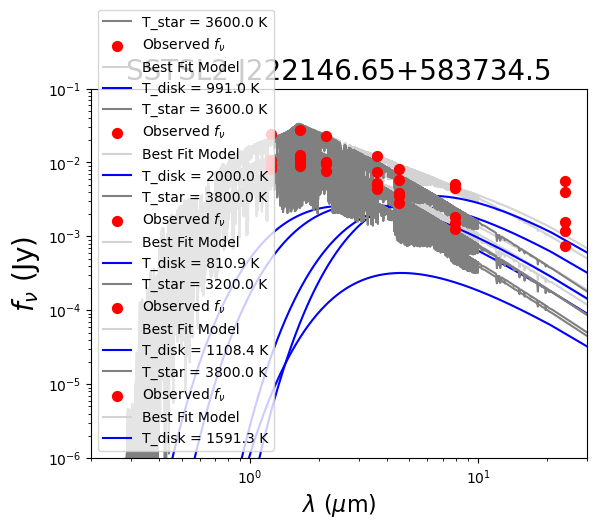

In [11]:
#for i in range(len(star_file)):
for i in range(5):
    
    row_number = i
    
    # Getting the wavelengths, fluxes, and flux errors for each star.
    all_wavelengths, all_fluxes, all_flux_errors = obs_wavelengths_fluxes_flux_errors(star_file, row_number)
    
    # Getting the closest star temperature to the Nextgen model
    star_temp = nextgen_model_temp(star_file, row_number)
    
    # Rescalling the Nextgen model to flux in Janskys. Also getting the wavelengths in microns.
    wavelengths_microns_nextgen, fluxes_F_nu_nextgen = scalling_nextgen_model_to_obs(star_file, star_temp)
    
    # Interpolate stellar model flux values for all wavelength values from the
    # stellar model file data. This is the Nextgen flux at each wavelength we are considering.
    fluxes_for_fit_nextgen = np.interp(all_wavelengths, wavelengths_microns_nextgen, fluxes_F_nu_nextgen)
    
    # Fitting parameters for the disk and the star
    dust_temp_initial_guess = 600.0
    normalization_factor_star = 1.0
    normalization_factor_thermal_component = 1.0
    fitting_bounds = ((100,-np.inf,-np.inf),(2000,np.inf,np.inf))

    try:
        # Execute curve fitting
        popt,pcov = curve_fit(function_model_star_and_dust, \
                    all_wavelengths,all_fluxes, \
                    p0=(dust_temp_initial_guess, \
                    normalization_factor_thermal_component, normalization_factor_star), \
                    sigma = all_flux_errors, bounds = fitting_bounds)

        # Optimized values for temperature, normalization_factor_thermal_component,
        # and normalization_factor_star for the best fit
        best_blackbody_temp, best_normalization_factor_thermal_component, best_normalization_star  = popt
    
    # If a fit is not found return, return NAN for the fitting parameters.
    except ValueError:
        best_blackbody_temp = np.NaN
        best_normalization_factor_thermal_component = np.NaN
        
        
    # best fit Stellar Model for plotting Stellar Model (y-values)
    fluxes_F_nu_nextgen_after_fit = best_normalization_star * fluxes_F_nu_nextgen

    # Apply the optimized parameters -> best fit thermal Model
    dust_fluxes = best_normalization_factor_thermal_component * \
                  blackbody_lambda(wavelengths_microns_nextgen,best_blackbody_temp)

    # Y-values for total flux line: NextGen + debris disk
    total_star_dust_fluxes = dust_fluxes + fluxes_F_nu_nextgen_after_fit
    
    # Plotting the results
    plt.loglog(wavelengths_microns_nextgen, fluxes_F_nu_nextgen_after_fit, color = "gray", label="T_star = %.1f K"%(star_temp), zorder=2)
    plt.scatter(all_wavelengths, all_fluxes, color="red", s=50, zorder=3, label="Observed " + r"$f_{\nu}$")
    plt.loglog(wavelengths_microns_nextgen,total_star_dust_fluxes,'-', color = 'lightgray',label='Best Fit Model', zorder=1)
    plt.loglog(wavelengths_microns_nextgen,dust_fluxes,'-', color = 'blue', label="T_disk = %.1f K"%(best_blackbody_temp), zorder=1)
    plt.xlabel(r"$\lambda$" + " " + r"$(\mu$" + "m)", fontsize = 16)
    plt.ylabel(r"$f_{\nu}$" + " (Jy)", fontsize = 20)
    plt.title(star_file["objid"][row_number], fontsize = 20)
    plt.xlim(0.2,30)
    plt.ylim(1.0e-6,1.0e-1)
    plt.legend()
    plt.savefig( star_file["objid"][row_number] + ".png", bbox_inches = "tight")
    plt.close()

